In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv("/home/vanchhit/Desktop/train.csv")
test = pd.read_csv("/home/vanchhit/Desktop/test.csv")
sample = pd.read_csv("/home/vanchhit/Desktop/sample_submission.csv")

In [4]:
train = train.drop("id", axis=1)
test = test.drop("id", axis=1)

In [5]:
display(train.head())
display(train.shape)
display(test.shape)

print('\n')
display(train.info())

print('\n')
display(train.nunique())

print('\n')
display(train.describe())

,gravity,ph,osmo,cond,urea,calc,target
0,1.013,6.19,443,14.8,124,1.45,0
1,1.025,5.40,703,23.6,394,4.18,0
2,1.009,6.13,371,24.5,159,9.04,0
3,1.021,4.91,442,20.8,398,6.63,1
4,1.021,5.53,874,17.8,385,2.21,1


(414, 7)

(276, 6)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  414 non-null    float64
 1   ph       414 non-null    float64
 2   osmo     414 non-null    int64  
 3   cond     414 non-null    float64
 4   urea     414 non-null    int64  
 5   calc     414 non-null    float64
 6   target   414 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 22.8 KB


None

gravity    28
ph         71
osmo       80
cond       65
urea       73
calc       85
target      2
dtype: int64

,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [6]:
print("Missing - Train Data")
display(pd.isna(train).sum())
print('\n')
print("There are ", pd.isna(train).sum().sum(), "missing values  in train data")
print('\n')
print('\n')
print('\n')

print("Missing - Test Data")
display(pd.isna(test).sum())
print('\n')
print("There are ", pd.isna(test).sum().sum(), "missing values  in test data")

Missing - Train Data


gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64



There are  0 missing values  in train data






Missing - Test Data


gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
dtype: int64



There are  0 missing values  in test data


In [7]:
print("There are ", train.duplicated().sum(), "duplicate rows in train data")
print("There are ", test.duplicated().sum(), "duplicate rows  in test data")

train = train.drop_duplicates()
test = test.drop_duplicates()

There are  0 duplicate rows in train data
There are  0 duplicate rows  in test data


<AxesSubplot:>

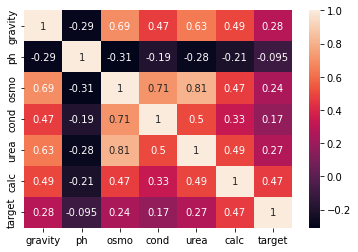

In [8]:
sns.heatmap(train.corr(), annot=True)

In [9]:
train.skew()

gravity    0.291010
ph         0.971308
osmo       0.147395
cond      -0.212009
urea       0.329107
calc       1.118533
target     0.224421
dtype: float64

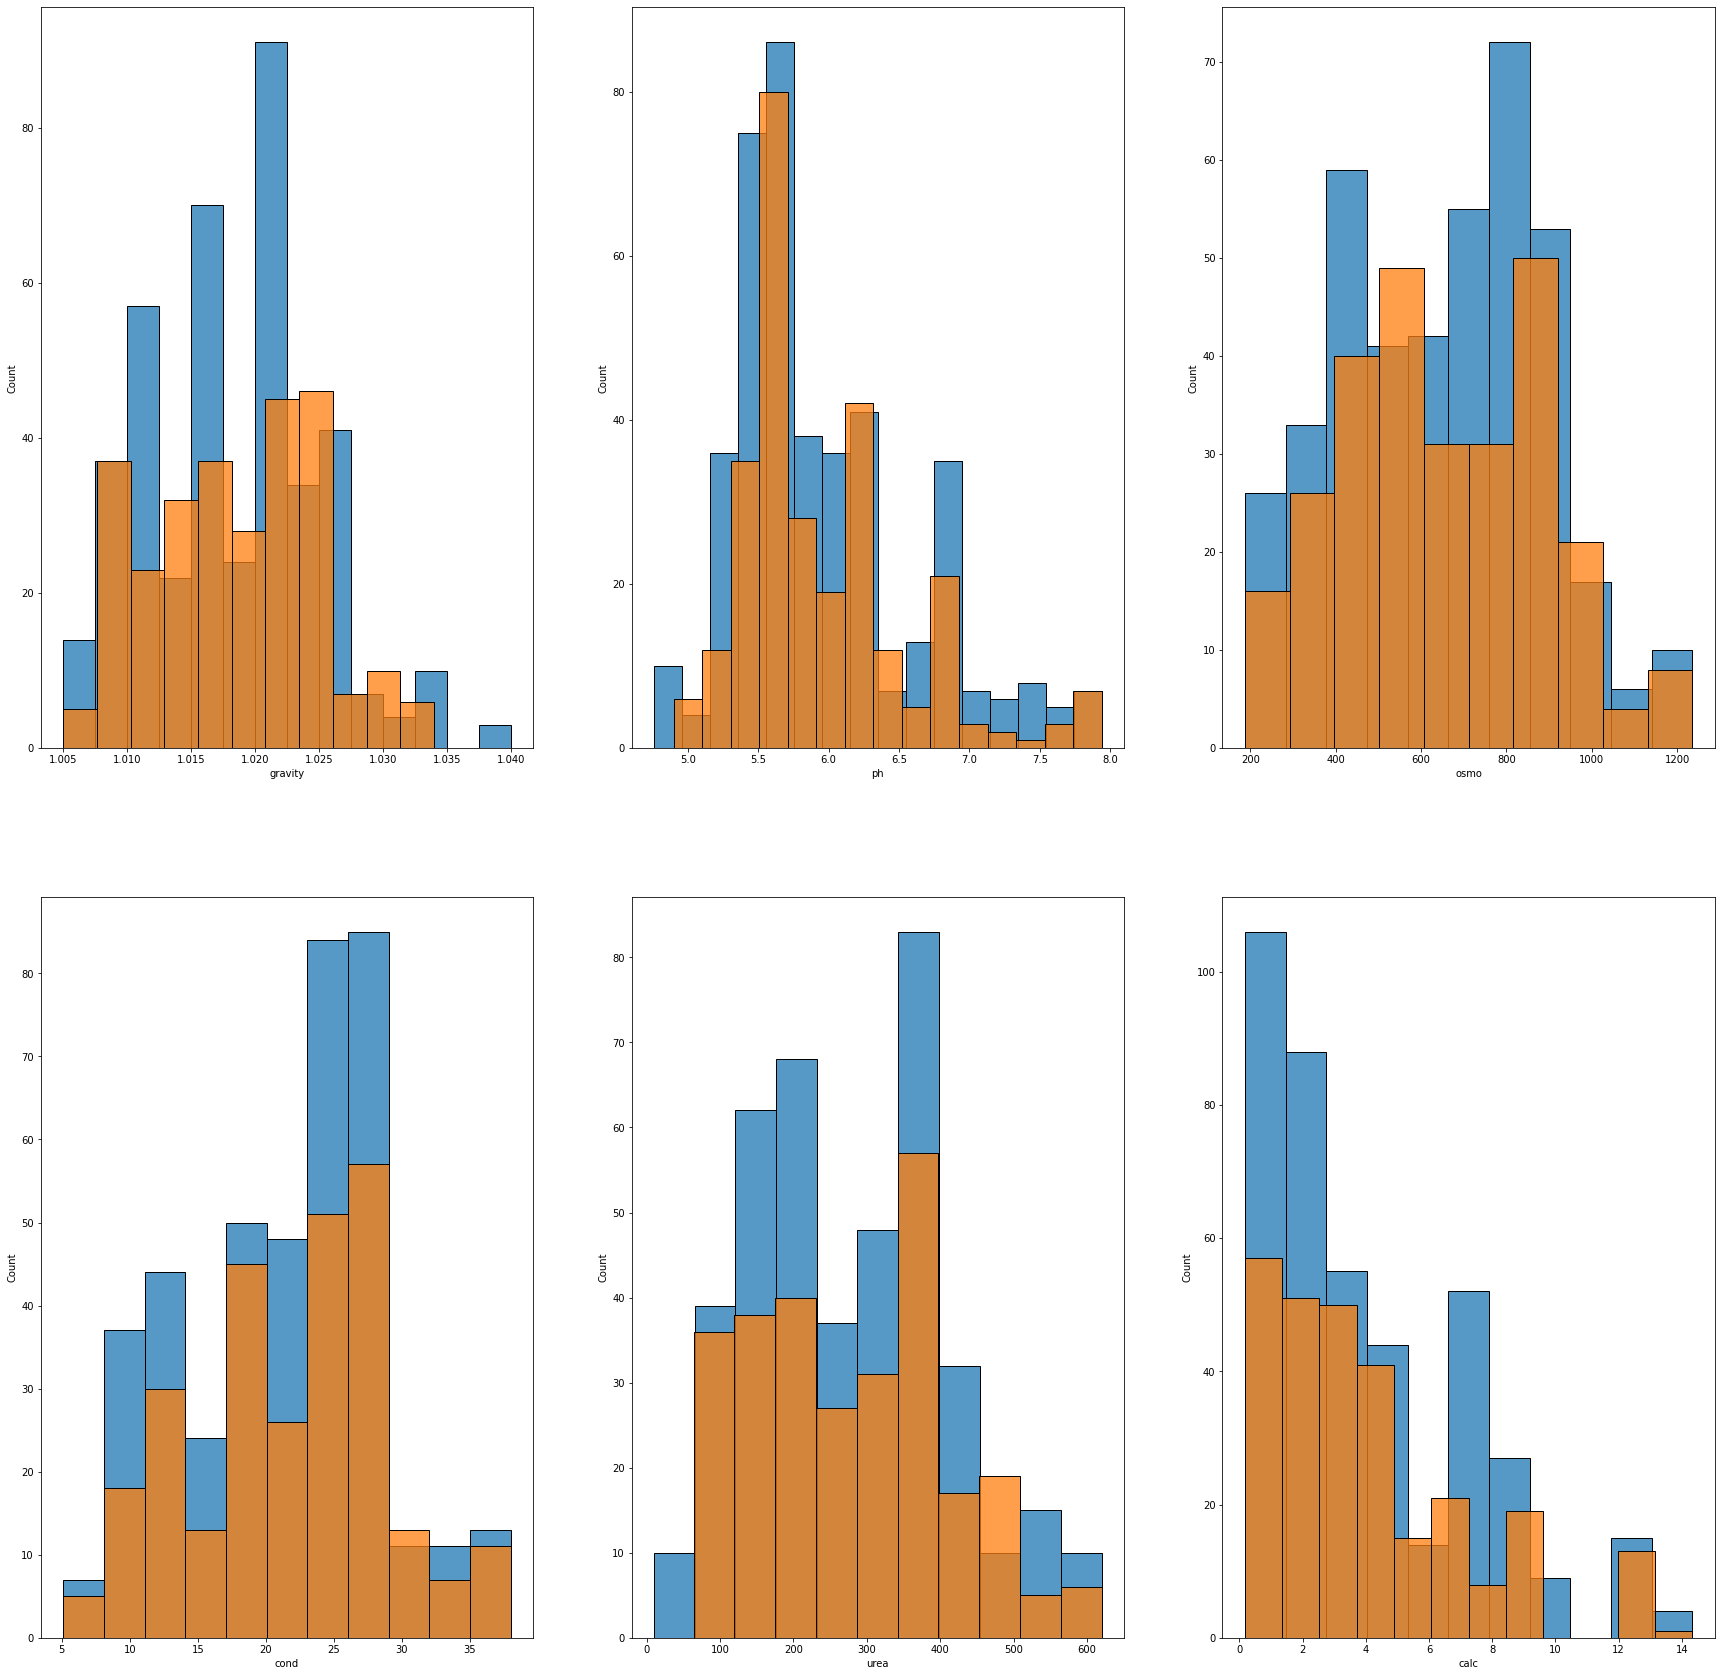

In [10]:
# Define the number of rows and columns you want
n_rows=2
n_cols=3
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(30,30))

for i, column in enumerate(test):
    sns.histplot(train[column],ax=axes[i//n_cols,i%n_cols])
    sns.histplot(test[column],ax=axes[i//n_cols,i%n_cols])

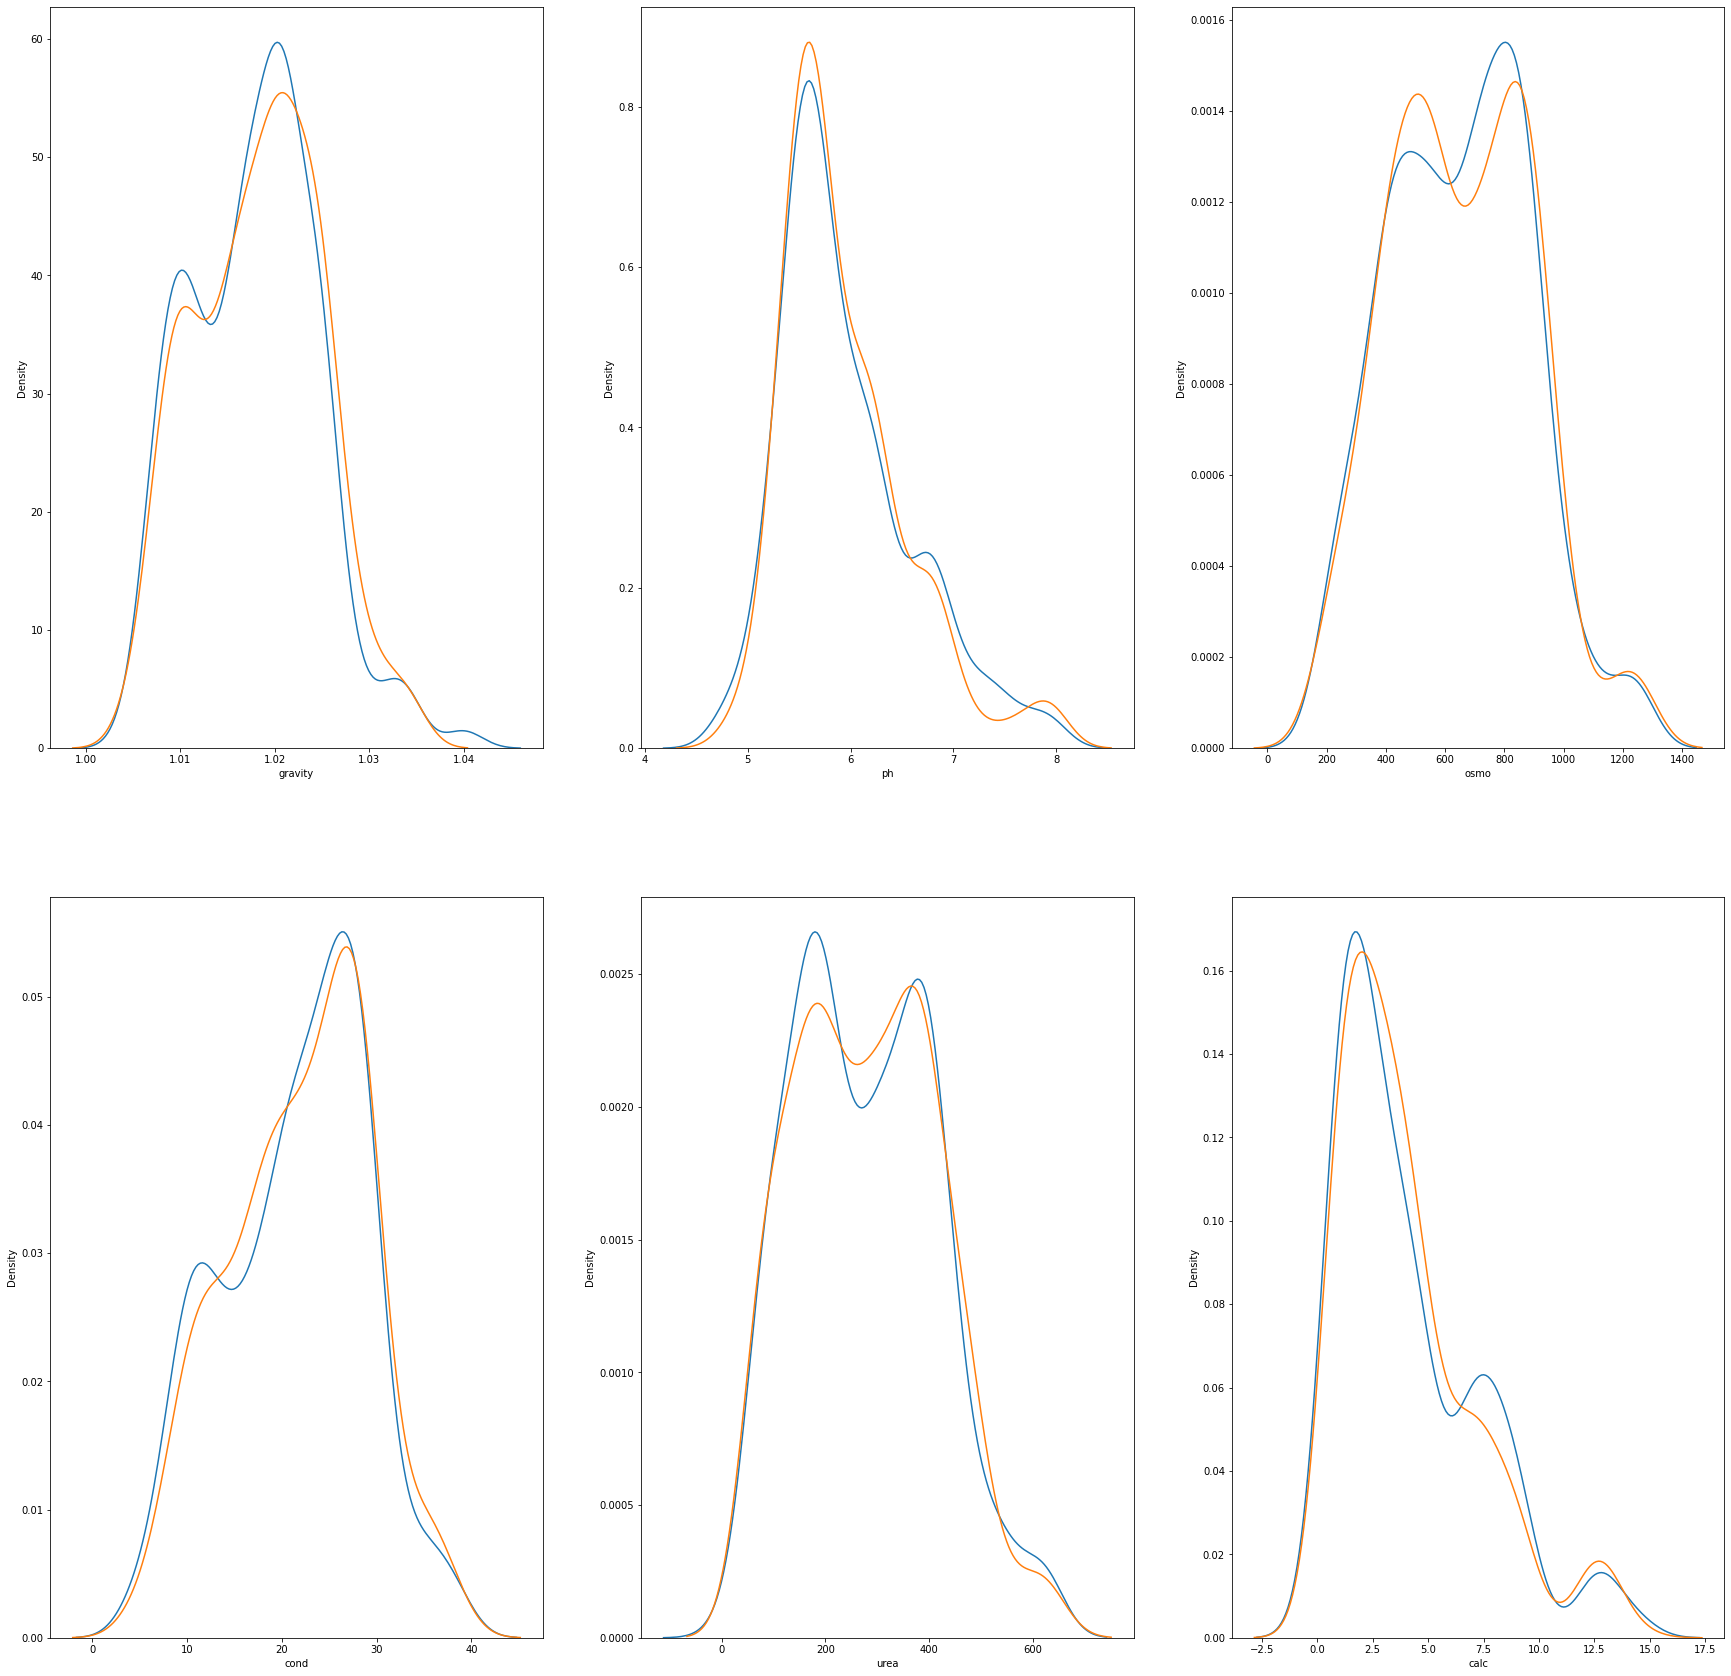

In [11]:
# Define the number of rows and columns you want
n_rows=2
n_cols=3
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(30,30))

for i, column in enumerate(test):
    sns.kdeplot(train[column],ax=axes[i//n_cols,i%n_cols])
    sns.kdeplot(test[column],ax=axes[i//n_cols,i%n_cols])

In [12]:
X_train = train.drop("target", axis=1)
X_test = test
y_train = train["target"]

In [13]:
scalar = StandardScaler()
X_train[X_train.columns] = pd.DataFrame(scalar.fit_transform(X_train))
X_test[X_test.columns] = pd.DataFrame(scalar.fit_transform(X_test))

In [14]:
from sklearn.model_selection import cross_val_score
from IPython.display import display
seed = 19

# MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

models = [
    LogisticRegression(max_iter=2000, random_state=seed),
    KNeighborsClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    DecisionTreeClassifier(random_state=seed),
    SGDClassifier(random_state=seed), 
    RidgeClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    XGBClassifier(),
    ExtraTreesClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    BaggingClassifier(random_state=seed),
    LGBMClassifier(random_state=seed),
    CatBoostClassifier(logging_level="Silent")
]

models_name = [
    LogisticRegression().__class__.__name__,
    KNeighborsClassifier().__class__.__name__,
    LinearDiscriminantAnalysis().__class__.__name__,
    QuadraticDiscriminantAnalysis().__class__.__name__,
    DecisionTreeClassifier().__class__.__name__,
    SGDClassifier().__class__.__name__, 
    RidgeClassifier().__class__.__name__,
    AdaBoostClassifier().__class__.__name__,
    GradientBoostingClassifier().__class__.__name__,
    XGBClassifier().__class__.__name__,
    ExtraTreesClassifier().__class__.__name__,
    RandomForestClassifier().__class__.__name__,
    BaggingClassifier().__class__.__name__,
    LGBMClassifier().__class__.__name__,
    CatBoostClassifier().__class__.__name__
]

/home/vanchhit/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [15]:
score=[]
std = []

for i in models: 
    try: 
        score.append(np.mean(cross_val_score(estimator=i,X=X_train,y= y_train, cv=3, scoring='roc_auc'))) 
        std.append(np.std(cross_val_score(estimator=i,X=X_train,y= y_train, cv=3, scoring='roc_auc')))        
        print(i,': DONE') 
    except: 
        score.append('Error Occured') 
        print(i,': ERROR')

LogisticRegression(max_iter=2000, random_state=19) : DONE
KNeighborsClassifier() : DONE
LinearDiscriminantAnalysis() : DONE
QuadraticDiscriminantAnalysis() : DONE
DecisionTreeClassifier(random_state=19) : DONE
SGDClassifier(random_state=19) : DONE
RidgeClassifier(random_state=19) : DONE
AdaBoostClassifier(random_state=19) : DONE
GradientBoostingClassifier(random_state=19) : DONE
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
  

In [16]:
table = pd.DataFrame(models_name) 
table.columns = ['Models'] 
table['Result'] = score
table['Deviation'] = std
table.sort_values(by=["Result"], ascending = False)

,Models,Result,Deviation
11,RandomForestClassifier,0.774460,0.056904
6,RidgeClassifier,0.770021,0.066421
0,LogisticRegression,0.769385,0.065856
2,LinearDiscriminantAnalysis,0.769383,0.067055
14,CatBoostClassifier,0.765358,0.061794
10,ExtraTreesClassifier,0.761381,0.047008
8,GradientBoostingClassifier,0.760041,0.058026
12,BaggingClassifier,0.741690,0.035160
3,QuadraticDiscriminantAnalysis,0.733179,0.056346
7,AdaBoostClassifier,0.732196,0.053464


In [17]:
from sklearn.ensemble import VotingClassifier

voting= VotingClassifier(
    estimators=[('rf', RandomForestClassifier()),('log', LogisticRegression()), ('ld', LinearDiscriminantAnalysis()) ], voting="soft")

scores = cross_val_score(voting, X_train, y_train,
                         scoring="roc_auc", cv=4)

In [18]:
print(scores.mean())

0.7895575238696442


In [19]:
submission = pd.DataFrame(sample['id'])
model = VotingClassifier(
    estimators=[('rf', RandomForestClassifier()),('log', LogisticRegression()), ('ld', LinearDiscriminantAnalysis()) ], voting="soft")
model.fit(X_train, y_train)
pred = model.predict_proba(X_test)
submission['target'] = pred[:,1]
submission.to_csv('submission.csv', index=None)
submission

,id,target
0,414,0.246394
1,415,0.450171
2,416,0.927611
3,417,0.459182
4,418,0.311008
...,...,...
271,685,0.760602
272,686,0.146756
273,687,0.578142
274,688,0.213933


In [20]:
from IPython.display import FileLink
FileLink(r'submission.csv')

/home/vanchhit/joyconda/submission.csv